In [78]:
import pandas as pd 
df = pd.read_csv("../data/paint.csv")


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Relative humidity (%)  31 non-null     float64
 1   type                   31 non-null     int64  
 2   Evaporation (% wt)     31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 876.0 bytes


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative humidity (%),31.0,52.470968,16.479972,28.0,37.2,56.0,70.0,77.0
type,31.0,0.516129,0.508001,0.0,0.0,1.0,1.0,1.0
Evaporation (% wt),31.0,8.045161,2.453547,4.0,6.0,8.0,9.3,13.0


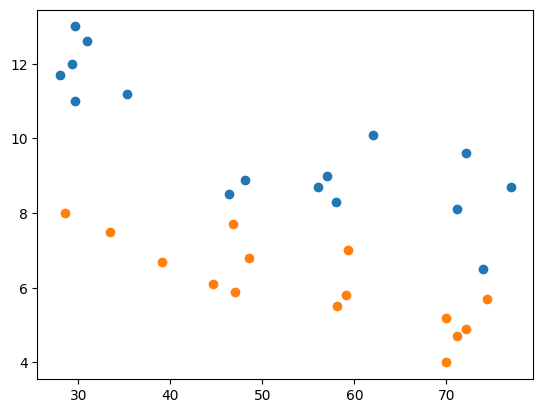

In [81]:
import matplotlib.pyplot as plt

# First Split
splitA = df[df["type"] == 1]
splitB = df[df["type"] == 0]
# Second Split
X_A = splitA["Relative humidity (%)"]
X_B = splitB["Relative humidity (%)"]
Y_A = splitA["Evaporation (% wt)"]
Y_B = splitB["Evaporation (% wt)"]

plt.scatter(X_A, Y_A)
plt.scatter(X_B, Y_B)



<Axes: xlabel='Relative humidity (%)', ylabel='Evaporation (% wt)'>

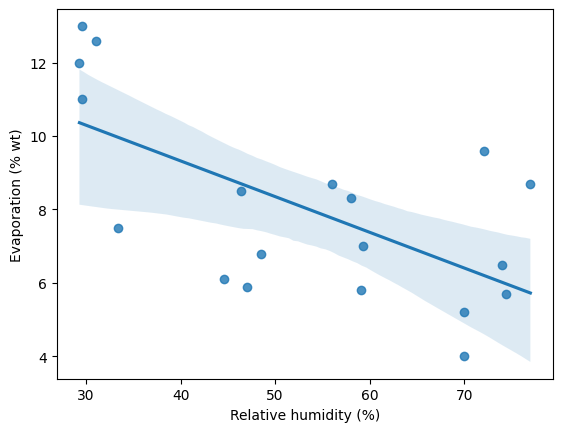

In [82]:
import seaborn as sns

# Plockar ut en randomstick prov
val = df.sample(frac=0.4, random_state=42, replace=False)
# Resettar indexen
df = df.drop(val.index)

# Splittar den till X och Y
Y = df["Evaporation (% wt)"]
X = df["Relative humidity (%)"]

# Lägger till en intercept
df.insert(0, "Intercept", 1)

# Gör en scatterplot + regrissons linje + R2 intervall
sns.regplot(x=X, y=Y)

In [83]:
import numpy as np
# Multiple Linjär Regression
X = df.drop("Evaporation (% wt)", axis="columns")
b = np.linalg.pinv(X.T @ X) @ X.T @ Y

array([8.0993985 , 7.98913414, 5.8626071 , 4.75208743, 4.60244293,
       4.36616215, 6.77622612, 8.0993985 , 6.02012762, 8.12302658,
       6.61082958, 5.76021876, 4.91748397, 4.91748397, 4.57093883,
       6.91799459, 7.80010951, 5.77597081, 6.72896997])

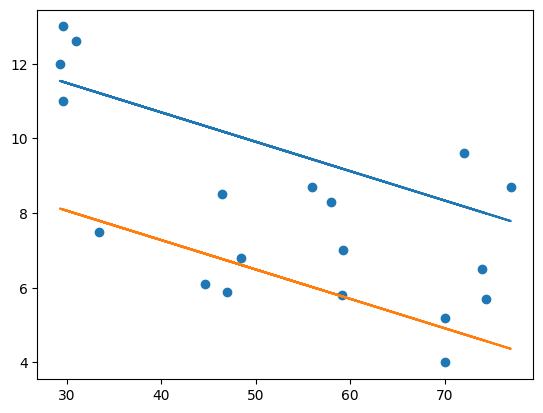

In [84]:
# När vi har categoriska variabler på en multiple 
# regression så får vi egentligen flera linjer 

# Indikator variablen delar modellen i flear modeller och 
# det blir logiskt eftersom 0*x inte påverkar och 1*x får vi en
# extra

# (bias+b2, b1) 
modA = np.append(b[0] + b[2], b[1:2])
# (bias, b1) 
modB = b[0:2]
X = X.to_numpy()
Y = Y.to_numpy()
# We split it for some reason
Xr = X[:, 0:2]
x = Xr[:, 1:2]
# Scatter plot
plt.scatter(x, Y)
# Regression or rather center of cluster line A 
plt.plot(x, Xr @ modA)
# Regression or rather center of cluster line B
plt.plot(x, Xr @ modB)

Xr @ modB

In [85]:
# Istället för att ha en linjer som skiljer punkterna 
# så blir en linje ett center av ett kluster 
# x == En observation i X
# y == En observation i Y
def classify(x, y):
    # Tror vi lägger till 1 för att kunna hantera Biasen
    row_x = [1.0, x]
    # Gör en OLS för observationen/punkten imot linjeA 
    ea_sq = np.square(y - np.dot(row_x, modA))
    # Gör en OLS för observationen/punkten imot linjeB
    eb_sq = np.square(y - np.dot(row_x, modB))
    # Retunerar True om avståndet till linje A är mindre än till Linje B
    return ea_sq < eb_sq

In [86]:
Y = val["Evaporation (% wt)"]
X = val["Relative humidity (%)"]
T = val["type"]
correct = True
# Går igenom varje punkt|observartion och ser om den är närmast linje A eller linje B
# Om classifiseringen stämmer med type lablen så får den correct 
for i, x in enumerate(X):
    correct &= T.iloc[i] == classify(x, Y.iloc[i])
# Om alla är korrekta så är det True
print(f"Alla klassificeringar i validering korrekta? {correct}")
# &=  
# b = b & a 

Alla klassificeringar i validering korrekta? True
